In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Roteiro Aprendizado Supervisionado

1. Passo I: Escolha uma classe de modelo importando do Scikit.
2. Passo II: Escolha os hiperparâmetros do modelo instaciando a classe escolhida no Passo I.
3. Passo III: Organize os dados em uma *feature matrix* e um *target array*.
4. Passo IV: Ajuste o modelo invocando o método **fit()**.
5. Passo V: Aplique o modelo aos novos dados usando **predict()**.

# Classes de Modelos do Scikit

1. "Regressão Logística": classificação
2. Redes Neurais
3. SUM
4. Redes Bayesianas (GaussianNB - Naive Bayes): modelo matemático probabilístico

## Por Naive Bayes

In [ ]:
# Passo I: escolha do modelo
from sklearn.naive_bayes import GaussianNB
# Passo II: escolha dos hiperparâmetros e instanciação
model_bayes = GaussianNB()

In [ ]:
#Passo III_I: Feature Matrix
X_iris = iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Passo III_II: Target Array
y_iris = iris.species
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
#Passo III_III: Separação do Banco de Dados
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=2020)#42

#random_state (seed): reproduzir em diversas máquina com valores aproximados

In [ ]:
#Passo IV: Ajuste o modelo aos dados
model_bayes.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Passo V: Faça predições em dados novos
y_model_bayes = model_bayes.predict(Xtest)
y_model_bayes

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor'], dtype='<U10')

* Medida da Acurácia = (Todo - Erro)/Todo

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model_bayes)

0.868421052631579

## Por Decision Tree

In [ ]:
#Passo I
from sklearn.tree import DecisionTreeClassifier
#Passo II
model_decision = DecisionTreeClassifier()
#Passo IV
model_decision.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Passo V
y_model_decision = model_decision.predict(Xtest)
y_model_decision

array(['virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor'], dtype=object)

In [ ]:
#y_model_bayes
#y_model_decision
#y_test
accuracy_score(ytest, y_model_bayes)

0.868421052631579

In [ ]:
accuracy_score(ytest, y_model_decision)

0.8947368421052632

## Análise dos Resultados (Matriz de Confusão)

### Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix
mat_bayes = confusion_matrix(ytest, y_model_bayes)
mat_bayes

array([[15,  0,  0],
       [ 0,  9,  2],
       [ 0,  3,  9]])

Text(83.40000000000006, 0.5, 'Valores Reais')

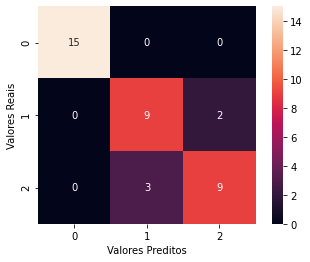

In [ ]:
sns.heatmap(mat_bayes, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

### Decision Tree

In [ ]:
mat_decision = confusion_matrix(ytest, y_model_decision)
mat_decision

array([[15,  0,  0],
       [ 0,  9,  2],
       [ 0,  2, 10]])

Text(83.40000000000006, 0.5, 'Valores Reais')

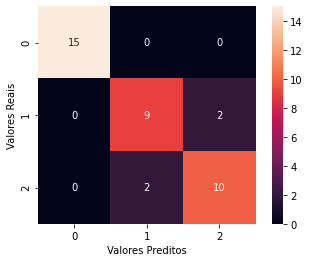

In [ ]:
sns.heatmap(mat_decision, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, X_iris, y_iris, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [ ]:
model_bayes_cv = GaussianNB()
cross_val_score(model_bayes_cv, X_iris, y_iris, cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Leave One Out

In [ ]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model_bayes_cv, X_iris, y_iris, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#Acurácia
scores.mean()

0.9533333333333334